#Home Work 2:
##-Colin Burke

#Part 1

In [4]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Number of Molecules')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


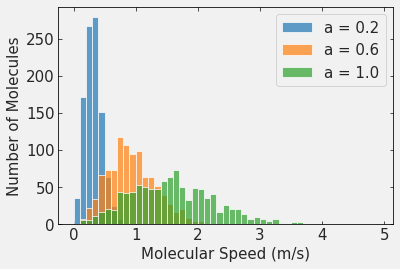

In [5]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend();

plt.xlabel('Molecular Speed (m/s)')
plt.ylabel('Number of Molecules')

the correct answer is 'a' correlates to the square root of 1/T. 1/T to the 1/2 power is equal to the square root of 1/T, meaning that as T(or 'a')increases, so should the speed of the gas atoms.

In [6]:
(sqrt(2)*((sp.special.gamma((4)/2))/(sp.special.gamma(3/2))))*.2

0.3191538243211462

In [7]:
(sqrt(2)*((sp.special.gamma((4)/2))/(sp.special.gamma(3/2))))*.6

0.9574614729634384

In [8]:
(sqrt(2)*((sp.special.gamma((4)/2))/(sp.special.gamma(3/2))))*1

1.5957691216057308

The mean of each of our corresponding 'a' values is almost exactly the same as the most probable molecular speed for that 's' value. Together their mean is representatibe of the middle data set.

#Part 2

In [9]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl

from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


In [0]:
import numpy as np
np.random.seed(456)
md = {}

## Distribution 1: Chi Squared

Text(0.5, 0, 'x')

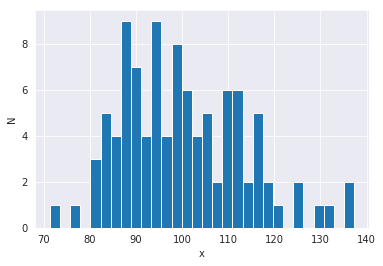

In [11]:
distributions = ['chisq']
mymean = 100
df = mymean
md['chisq'] = np.random.chisquare(mymean, size=100)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

**Figure 1.1: Chi Sq. distribution of a sample size 100 for a Chi Sq. distribution with 100 degrees of freedom.**

In [12]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

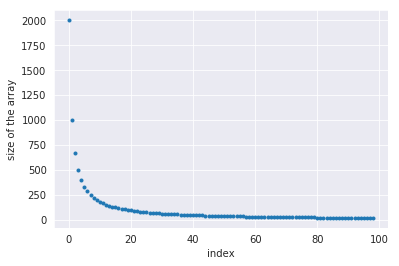

In [13]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)

print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")


**Figure 1.2: Chi Sq. distribution of 100 different sample sizes.**


Text(1259.3999999999999, 100, 'expected mean')

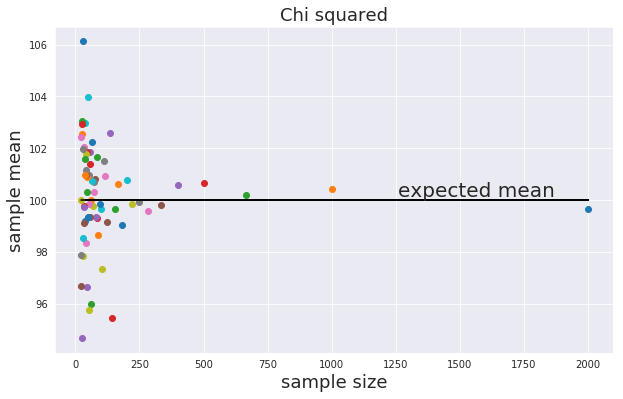

In [14]:
md['chisq'] = {} 
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 1.3: Chi Sq. distrubution of sample size as a function of sample mean(compared to expected mean value).**

This plot shows that as the sample size increases, the sample mean will be closer to the expected mean. This is in direct accordance with the Law of Large Numbers. LLN states that the average of the results from a large number of trials will tend to become closer to the expected value as more trials are performed.

_________________________________________________________

Text(0, 0.5, 'N')

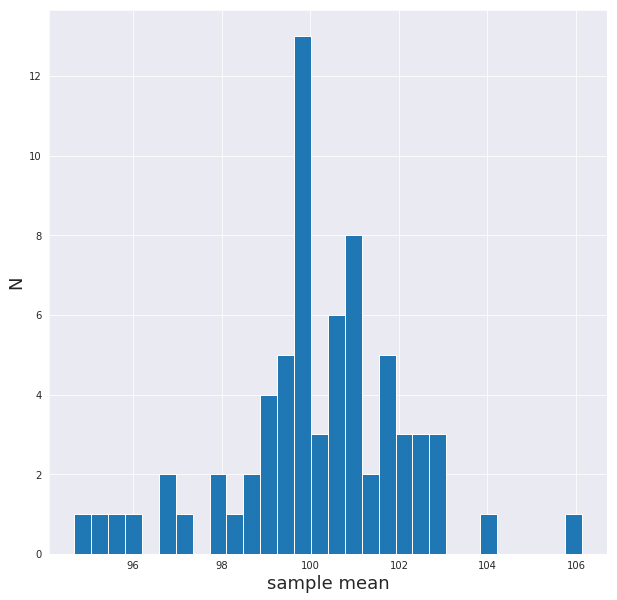

In [15]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 1.4: Sample means for 100 Chi Sq. distributions.**

##Distribution 2: Normal

Text(0.5, 0, 'x')

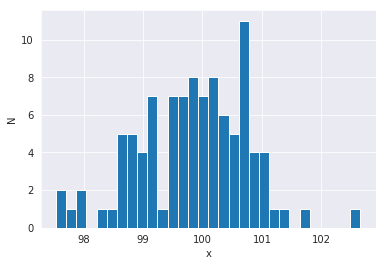

In [16]:
distributions = ['lnorm']
mymean = 100
df = mymean
md['lnorm'] = np.random.normal(mymean, 1.00, size=100)
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

**Figure 2.1: Normal distribution with a sample size and mean of 100, and standard deviation of 1.**

In [17]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Normal mean: 99.84, standard deviation: 0.92


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

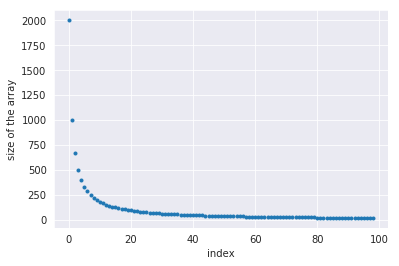

In [18]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)

print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 2.2: Normal distribution of 100 different sample sizes.**

Text(1259.3999999999999, 100, 'expected mean')

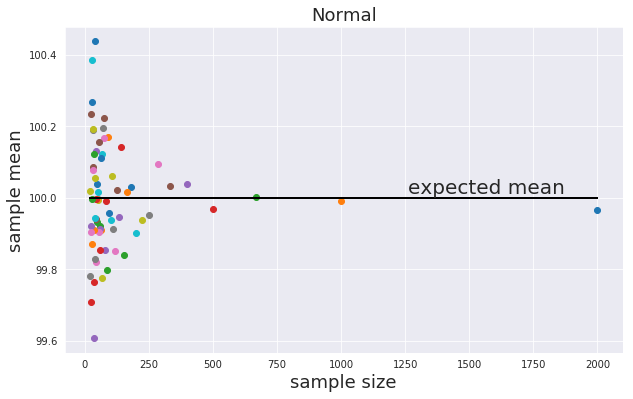

In [19]:
md['lnorm'] = {} 
for n in mysize:
    md['lnorm'][n] = np.random.normal(df, size = n)

md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Normal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axlnorm_mu_n.text(axlnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 2.3: Normal distribution of sample size as a function of sample mean(compared to expected mean value).**

This plot shows that as the sample size increases, the sample mean will be closer to the expected mean. This is in direct accordance with the Law of Large Numbers. LLN states that the average of the results from a large number of trials will tend to become closer to the expected value as more trials are performed.

relation to law of large #s and what I see. (large sample size, closer to  expected mean)

____________________________________

Text(0, 0.5, 'N')

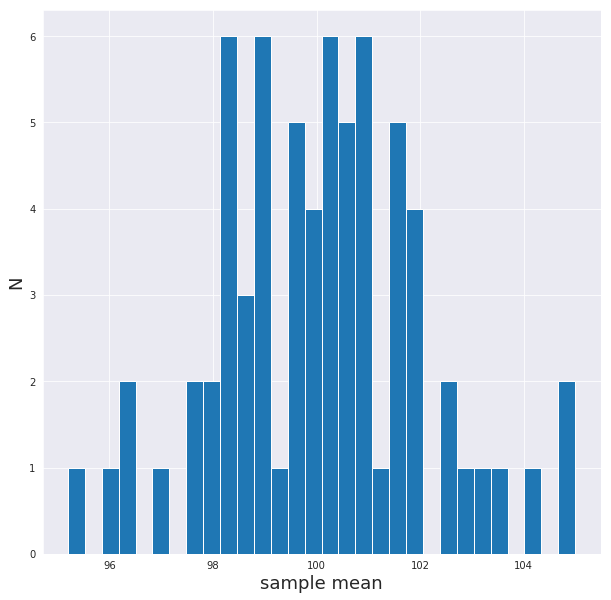

In [26]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 2.4: Sample means for 100 Normal distributions.**

##Distribution 3: Poission

Text(0.5, 0, 'x')

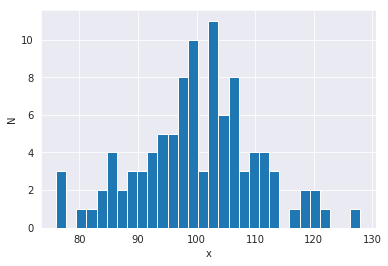

In [21]:
distributions = ['pois']
mymean = 100
lamda = mymean
md['pois'] = np.random.poisson(lamda, size=100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

**Figure 3.1: Poisson distribution with 100 degrees of freedom.**

In [22]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 100.15, standard deviation: 10.23


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

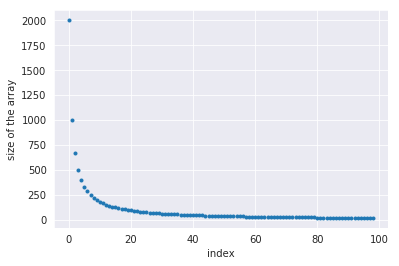

In [23]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)

print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 3.2: Poisson distribution of 100 different sample sizes.**

Text(1259.3999999999999, 100, 'expected mean')

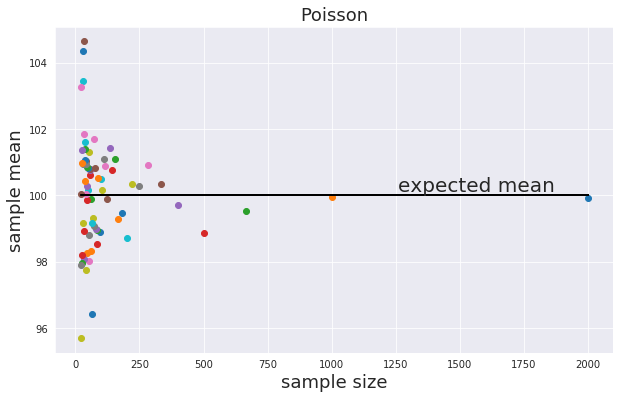

In [24]:
md['pois'] = {} 
for n in mysize:
    md['pois'][n] = np.random.poisson(lamda, size = n)

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 3.3: Poisson distribution of sample size as a function of sample mean(compared to expected mean value).**

This plot shows that as the sample size increases, the sample mean will be closer to the expected mean. This is in direct accordance with the Law of Large Numbers. LLN states that the average of the results from a large number of trials will tend to become closer to the expected value as more trials are performed.

_________________________________________________________

Text(0, 0.5, 'N')

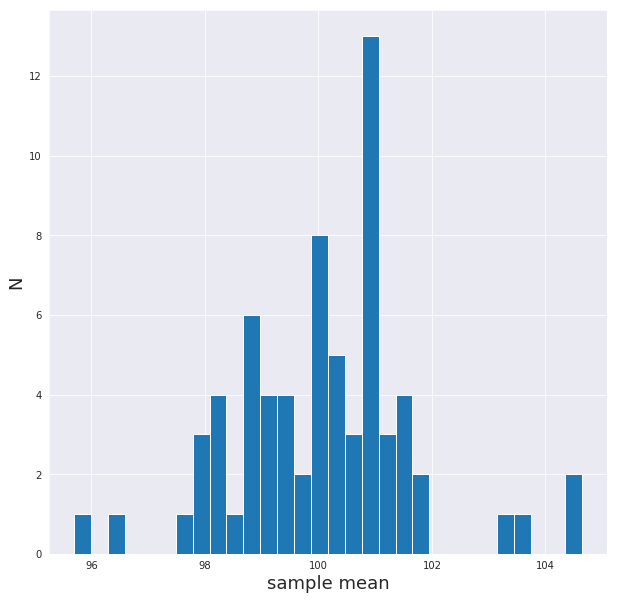

In [25]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 3.4: Sample means for 100 Poisson distributions.**

##Distribution 4: Binomial

Text(0.5, 0, 'x')

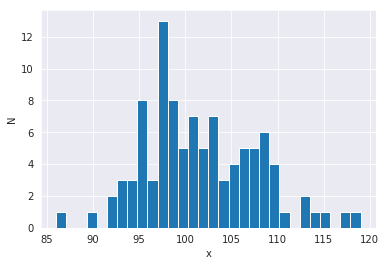

In [26]:
distributions = ['binomial']
mymean = 100
md['binomial'] = np.random.binomial(200, 0.5, size=100)
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

**Figure 4.1: Binomial distribution with 100 degrees of freedom.**

In [27]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 101.56, standard deviation: 6.17


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

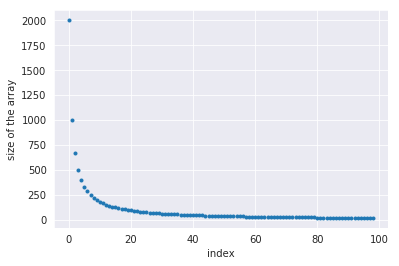

In [28]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)

print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 4.2: Binomial scatter plot of**

Text(1259.3999999999999, 100, 'expected mean')

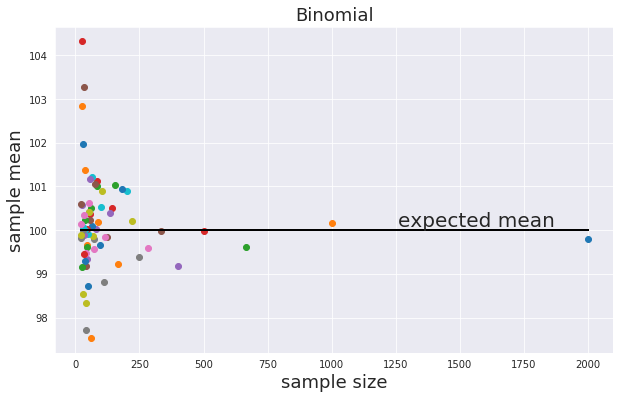

In [29]:
md['binomial'] = {} 
for n in mysize:
    md['binomial'][n] = np.random.binomial(200, 0.5, size = n)

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axbinomial_mu_n.text(axbinomial_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 4.3: Binomial distribution of sample size as a function of sample mean(compared to expected mean value).**

This plot shows that as the sample size increases, the sample mean will be closer to the expected mean. This is in direct accordance with the Law of Large Numbers. LLN states that the average of the results from a large number of trials will tend to become closer to the expected value as more trials are performed.

_________________________________________________________

Text(0, 0.5, 'N')

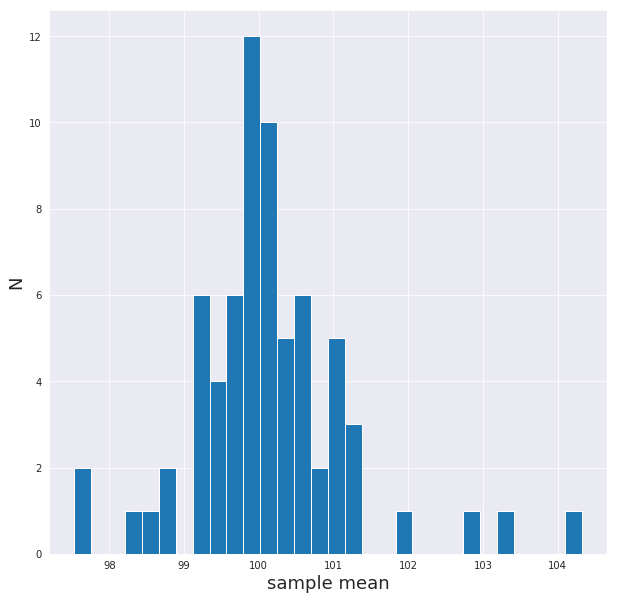

In [30]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 4.4: Sample means for 100 Binomial distributions**

##Distribution 5: Cauchy

Text(0.5, 0, 'x')

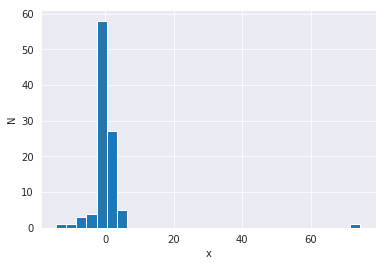

In [82]:
distributions = ['cauchy']
mymean = 0
md['cauchy'] = np.random.standard_cauchy(size=100)
pl.hist(md['cauchy'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

**Figure 5.1: Cauchy distribution with 100 degrees of freedom**

In [83]:
print ("Cauchy mean: %.2f, standard deviation: %.2f"%(md['cauchy'].mean(), md['cauchy'].std()))

Cauchy mean: 0.34, standard deviation: 7.93


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

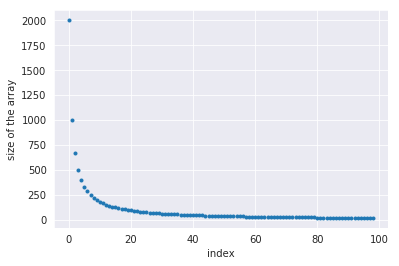

In [84]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)

print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 5.2: Cauchy distribution of 100 different sample sizes**

Text(1259.3999999999999, 0, 'expected mean')

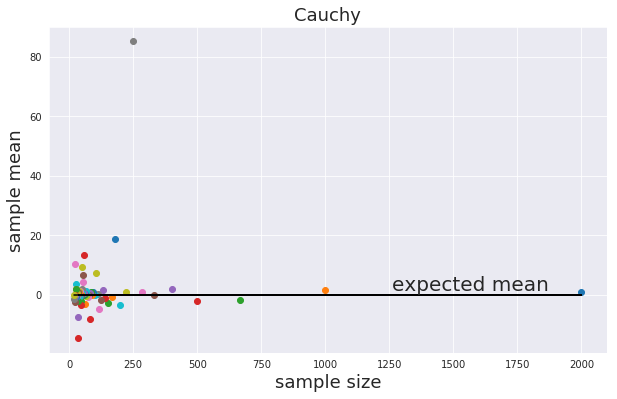

In [116]:
md['cauchy'] = {} 
for n in mysize:
    md['cauchy'][n] = np.random.standard_cauchy(size = n)

md['cauchy']['means'] = {}
axcauchy_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['cauchy']:
    if not type(nn) == str:
        md['cauchy']['means'][nn] = md['cauchy'][nn].mean()
        
        axcauchy_mu_n.plot(nn, md['cauchy']['means'][nn], 'o')
        axcauchy_mu_n.set_xlabel('sample size', fontsize=18)
        axcauchy_mu_n.set_ylabel('sample mean', fontsize=18)
        axcauchy_mu_n.set_title('Cauchy', fontsize=18)
        axcauchy_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axcauchy_mu_n.text(axcauchy_mu_n.get_xlim()[1] * .6, 0, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 5.3: Cauchy distribution of sample size as a function of sample mean(compared to expected mean value).**

This plot shows that as the sample size increases, the sample mean will be closer to the expected mean. This is in direct accordance with the Law of Large Numbers. LLN states that the average of the results from a large number of trials will tend to become closer to the expected value as more trials are performed.

_________________________________________________________

Text(0, 0.5, 'N')

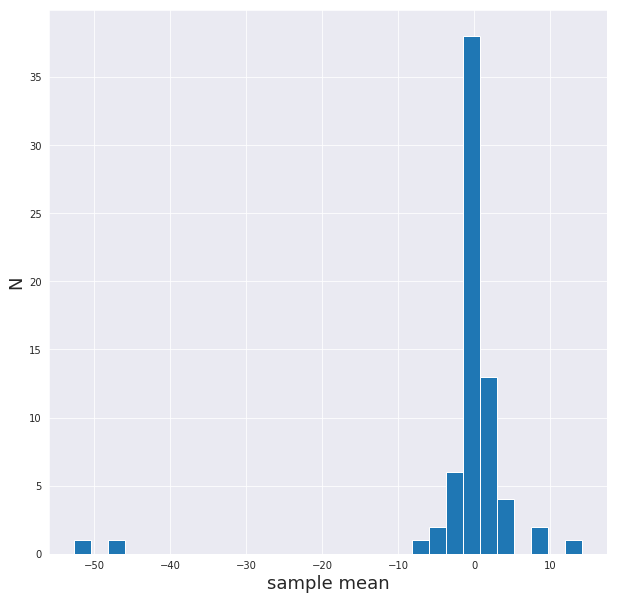

In [113]:
allmeans = list(md['cauchy']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 5.4: Sample means for 100 Cauchy distributions**